In [1]:
#Initially tried putting quotes and commas manually, was far too tedious so tried to standardize the names to put it in the array easily
#['Richard C Shelby', 'William G Barnes'], ['Lisa Murkowski', 'Joe Miller'], 
l1 = ': Richard C Shelby, William G Barnes : Lisa Murkowski, Joe Miller : John McCain, Rodney Glassman : John Boozman, Blanche Lambert Lincoln : Barbara Boxer, Carly Fiorina : Michael F Bennet, Ken Buck : Richard Blumenthal, Linda E McMahon : Marco Rubio, Charlie Crist, Kendrick Meek  : Johnny Isakson, Michael Thurmond : Daniel K Inouye, Cam Cavasso : Mike Crapo, P. Tom Sullivan : Mark Kirk, Alexander Giannoulias : Dan Coats, Brad Ellsworth : Chuck Grassley, Roxanne Conlin : Jerry Moran, Lisa Johnston : Rand Paul, Jack Conway : David Vitter, Charlie Melancon : Barbara Mikulski, Eric Wargotz : Roy Blunt, Robin Carnahan : Harry Reid, Sharron Angle : Kelly Ayotte, Paul W Hodes : Charles E Schumer, Jay Townsend : Richard Burr, Elaine Marshall : John Hoeven, Tracy Potter : Rob Portman, Lee Fisher : Tom Coburn, Jim Rogers : Ron Wyden, Jim Huffman : Pat Toomey, Joe Sestak : Jim DeMint, Alvin M Greene : Mike Lee, Sam Granato: Patrick Leahy, Daniel Freilich : Patty Murray, Dino Rossi : Ron Johnson, Russ Feingold' 

l2 = l1.replace(':', '"],["')
l3 = l2.replace(', ', '",\"')


from pytrends.request import TrendReq
import pandas as pd
import numpy as np

pytrend = TrendReq()
names = [[" Richard C Shelby","William G Barnes "],[" Lisa Murkowski","Joe Miller "],[" John McCain","Rodney Glassman "],[" John Boozman","Blanche Lincoln "],[" Barbara Boxer","Carly Fiorina "],[" Michael Bennet","Ken Buck "],[" Richard Blumenthal","Linda McMahon "],[" Marco Rubio","Charlie Crist"],[" Johnny Isakson","Michael Thurmond "],[" Daniel Inouye","Cam Cavasso "],[" Mike Crapo","Tom Sullivan "],[" Mark Kirk","Alexander Giannoulias "],[" Dan Coats","Brad Ellsworth "],[" Chuck Grassley","Roxanne Conlin "],[" Jerry Moran","Lisa Johnston "],[" Rand Paul","Jack Conway "],[" David Vitter","Charlie Melancon "],[" Barbara Mikulski","Eric Wargotz "],[" Roy Blunt","Robin Carnahan "],[" Harry Reid","Sharron Angle "],[" Kelly Ayotte","Paul Hodes "],[" Charles Schumer","Jay Townsend "],[" Richard Burr","Elaine Marshall "],[" John Hoeven","Tracy Potter "],[" Rob Portman","Lee Fisher "],[" Tom Coburn","Jim Rogers "],[" Ron Wyden","Jim Huffman "],[" Pat Toomey","Joe Sestak "],[" Jim DeMint","Alvin Greene "], ["John Thune" , "All Others"], [" Mike Lee","Sam Granato"],[" Patrick Leahy","Daniel Freilich "],[" Patty Murray","Dino Rossi "],[" Ron Johnson","Russ Feingold"]]


gtrends2010S = []

def searchState(kw_list):
  pytrend.build_payload(kw_list, geo = 'US',  timeframe = '2010-01-01 2010-11-02')
  iot_2010 = pytrend.interest_over_time()
  person1 = (sum(iot_2010[kw_list[0]]))/ ((sum(iot_2010[kw_list[0]])) + (sum(iot_2010[kw_list[1]])))
  person2 = 1-person1
  x = (person1, person2)
  gtrends2010S.append(x)


kw_list = [searchState(n) for n in names]


In [2]:
from pprint import pprint
gtrends2010Ss = ([item for c_list in gtrends2010S for item in c_list])
# https://stackoverflow.com/questions/22882143/split-lists-within-list
gtrends10S = pd.DataFrame(np.array(gtrends2010Ss))
df_gtrends_2010S = gtrends10S.rename(columns={0 : 'Percent Searched'})

In [3]:
df4 = pd.read_excel('2010.xlsx')

df_vote4 = df4[["GENERAL %" , "CANDIDATE NAME (Last, First)" , "DISTRICT" , "STATE"]]

df_real_vote4S = df_vote4[(df4["GENERAL %"]) >= 0]

df_Senate = df_real_vote4S[df_real_vote4S["DISTRICT"].str.contains("S", na=False)]

df_2010_Senate = df_Senate[df_Senate["CANDIDATE NAME (Last, First)"].str.contains("Scattered")==False]

df_2010S = df_2010_Senate.reset_index(inplace = False)

In [5]:
df_2010S = df_2010S[["CANDIDATE NAME (Last, First)" , "GENERAL %"]]

df_combined3 = df_2010S.join(df_gtrends_2010S, how = "left")

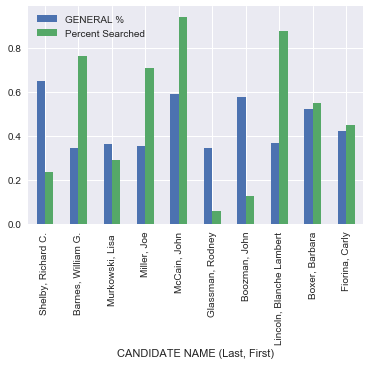

In [9]:
%matplotlib inline

df_combined3.head(10).plot(kind = "bar" , x = "CANDIDATE NAME (Last, First)")

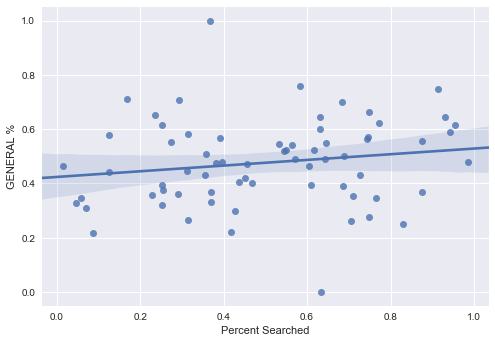

In [7]:
import seaborn as sns 

sns.regplot(x = "Percent Searched" , y = "GENERAL %" , data = df_combined3)

In [8]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import statsmodels.regression.mixed_linear_model as sm_mlm

ols = smf.ols(formula = "PS ~ GP", data = df_combined3.rename(columns = {"GENERAL %" : "GP", "Percent Searched" : "PS"}))
model = ols.fit()
model.summary()

C:\Users\catjm\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PS   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.893
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.173
Time:                        13:52:21   Log-Likelihood:                -1.8929
No. Observations:                  68   AIC:                             7.786
Df Residuals:                      66   BIC:                             12.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3730      0.097      3.837      0.000       0.179       0.567
GP             0.2666      0.194      1.376      0.173      -0.120       0.653
==============================================================================
Omnibus:                        7.788   Durbin-Watson:                   2.887
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                2.759
Skew:                          -0.002   Prob(JB):                        0.252
Kurtosis:                       2.013   Cond. No.                         7.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

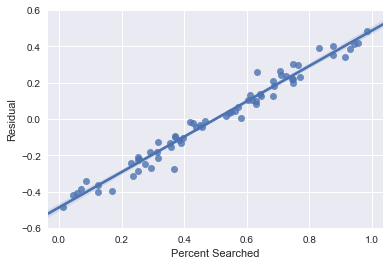

In [10]:
sns.regplot(x = df_combined3["Percent Searched"], y = pd.Series(model.resid, name = "Residual"))